In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({i: name for i, name in enumerate(target_names)})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='ml')
fa.fit(df[feature_names])

# Obtener resultados
loadings = pd.DataFrame(
    fa.loadings_,
    columns=['Factor1', 'Factor2'],
    index=feature_names
)

communalities = pd.DataFrame(
    fa.get_communalities(),
    index=feature_names,
    columns=['Comunalidad']
)

# Obtener puntajes factoriales para visualización
factor_scores = fa.transform(df[feature_names])

c:\Users\joanf\OneDrive\Documentos\Estudios\MUCEIM\Statistical Learning for Data Science\Exercises\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\joanf\OneDrive\Documentos\Estudios\MUCEIM\Statistical Learning for Data Science\Exercises\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


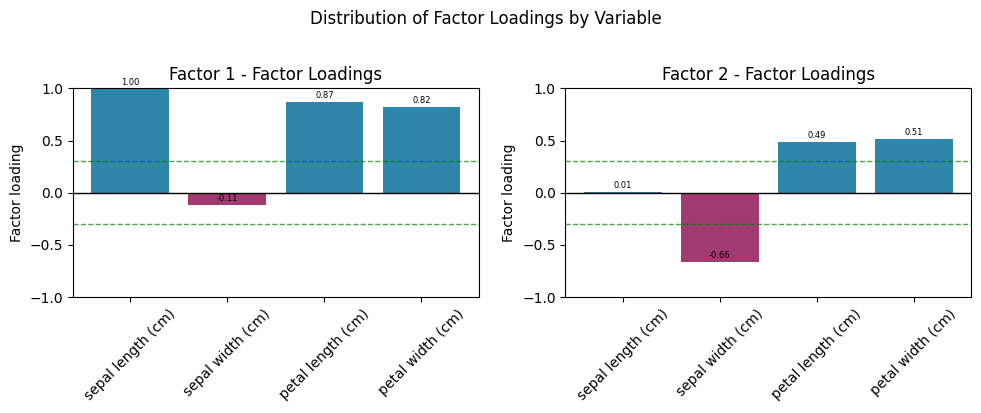

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Factor 1
ax = axes[0]
bars1 = ax.bar(loadings.index, loadings['Factor1'], color=['#2E86AB' if x > 0 else '#A23B72' for x in loadings['Factor1']])
ax.axhline(y=0, color='black', linewidth=1)
ax.axhline(y=0.3, color='green', linestyle='--', alpha=0.7, linewidth=1)
ax.axhline(y=-0.3, color='green', linestyle='--', alpha=0.7, linewidth=1)
ax.set_title('Factor 1 - Factor Loadings')
ax.set_ylabel('Factor loading')
ax.set_ylim(-1, 1)
ax.tick_params(axis='x', rotation=45)


for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=6)

# Factor 2
ax = axes[1]
bars2 = ax.bar(loadings.index, loadings['Factor2'], color=['#2E86AB' if x > 0 else '#A23B72' for x in loadings['Factor2']])
ax.axhline(y=0, color='black', linewidth=1)
ax.axhline(y=0.3, color='green', linestyle='--', alpha=0.7, linewidth=1)
ax.axhline(y=-0.3, color='green', linestyle='--', alpha=0.7, linewidth=1)
ax.set_title('Factor 2 - Factor Loadings')
ax.set_ylabel('Factor loading')
ax.set_ylim(-1, 1)
ax.tick_params(axis='x', rotation=45)


for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=6)

plt.suptitle('Distribution of Factor Loadings by Variable', y=1.02)
plt.tight_layout()
plt.savefig('./figures/efa_loadings_barchart.png', dpi=300, bbox_inches='tight')
plt.show()

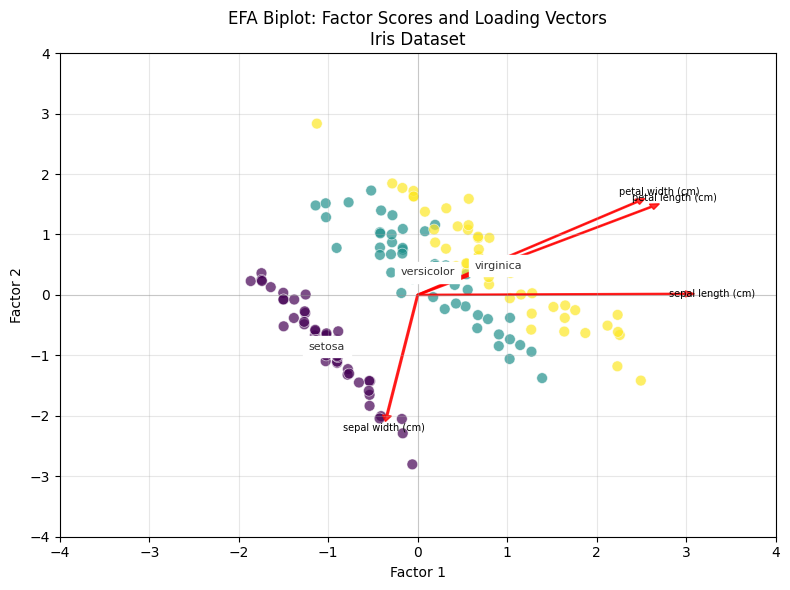

In [20]:
fig3, ax3 = plt.subplots(figsize=(8, 6))

# Create scatter plot of factor scores colored by species
scatter = ax3.scatter(factor_scores[:, 0], factor_scores[:, 1], 
                     c=df['target'], cmap='viridis', alpha=0.7, s=60, 
                     edgecolor='white', linewidth=0.5)
for i, species in enumerate(target_names):
    mask = df['target'] == i
    centroid_x = np.mean(factor_scores[mask, 0])
    centroid_y = np.mean(factor_scores[mask, 1])
    ax3.text(centroid_x, centroid_y, species, fontsize=8, ha='center', va='center', backgroundcolor='white', alpha=0.8)

# Draw loading vectors (biplot)
vector_scale = 3  # Scale vectors for better visualization
for i, feature in enumerate(feature_names):
    x_end = loadings.loc[feature, 'Factor1'] * vector_scale
    y_end = loadings.loc[feature, 'Factor2'] * vector_scale
    ax3.arrow(0, 0, x_end, y_end, head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.8, width=0.02)
    ax3.text(x_end * 1.1, y_end * 1.1, feature, fontsize=7, ha='center', va='center')

# Reference lines
ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.8)
ax3.axvline(x=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.8)

# Plot settings
ax3.set_xlabel('Factor 1')
ax3.set_ylabel('Factor 2')
ax3.set_title('EFA Biplot: Factor Scores and Loading Vectors\nIris Dataset')

# Grid and limits
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-4, 4)
ax3.set_ylim(-4, 4)

plt.tight_layout()
plt.savefig('./figures/efa_biplot.png', dpi=300, bbox_inches='tight')
plt.show()